In [1]:
# Load required modules ===============================================================
%matplotlib inline
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Load data/Read in CSV files ===============================================================
combined = pd.ExcelFile('Data.For.Histograms.xlsx')
drinking = combined.parse('Drinking.Behavior')
sexual = combined.parse('Sexual.Behavior')

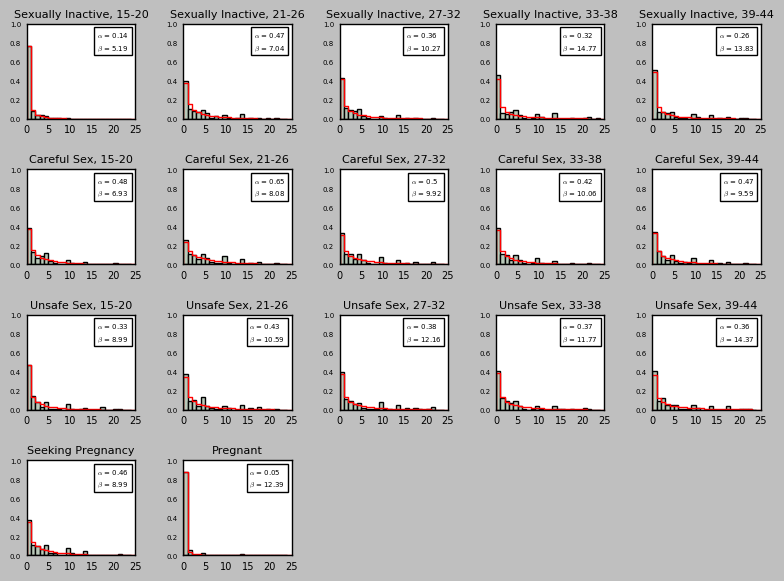

In [3]:
# Plot 'drinking' histograms ===============================================================
mpl.style.use('classic') # Use classic MPL layout
fig = plt.figure() # add plot figure
for i in range(0, len(drinking.columns), 5): # For-loop for creating subplots grouped by category
    for j in range(5):
        if (i + j < 17):
            ax = plt.subplot2grid((4,5), (i/4,j)) # Create subplot
            ax.tick_params(length=0) # Remove tick marks
            plt.hist(drinking.iloc[2:, i + j].dropna(), bins=range(25), color = '#b9c9b9', normed = True)
            poisson = []
            alpha, beta = list(drinking.iloc[0:2, i + j].dropna()) # Get alpha and beta values from table
            for x in range(25): # Create poisson distrubtion
                term1 = math.gamma(x+alpha)/math.gamma(alpha)/math.factorial(x)
                term2 = math.pow(beta, x)/math.pow(1+beta, alpha + x)
                poisson.append(term1 * term2)
            poisson = [0] + poisson # Append extra data point to shift overlay to the right
            plt.plot(range(26), poisson, color = 'red', ls = 'steps') # Plot poisson distribution
            plt.xlim(0, 25)
            plt.ylim(0,1)
            plt.xticks(fontsize = 7)
            plt.yticks(fontsize = 5)
            plt.title(list(drinking)[i + j], size = 8)
            legend = plt.legend(['$\\alpha$' + ' = ' + str(round(drinking.iloc[0:2, i + j].dropna()[0], 2))
                        , '$\\beta$' + ' = ' + str(round(drinking.iloc[0:2, i + j].dropna()[1], 2))], 
                       prop={'size':5}, handlelength=0, handletextpad=0)
            for handle in legend.legendHandles: # Turn legend handles off
                handle.set_visible(False)
plt.tight_layout() # Ensure tight layout so legend/labels are not cut off
plt.savefig('drinking.pdf')

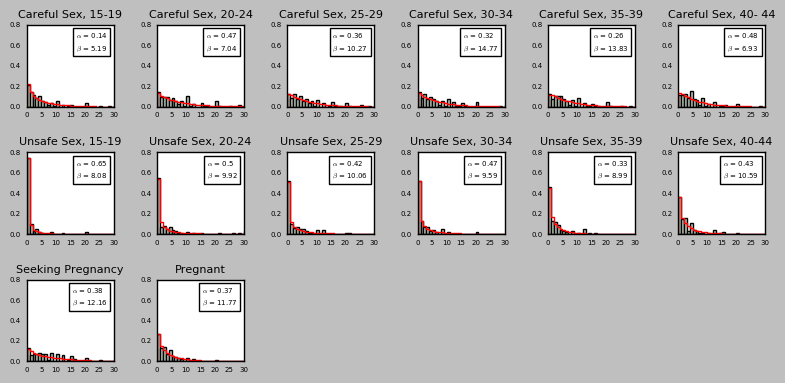

In [4]:
# Plot 'sexual' histograms; modified code from above ===============================================================
fig = plt.figure(figsize=(8, 4)) # add plot figure
for i in range(0, len(sexual.columns), 6):
    for j in range(6):
        if (i + j < 14):
            ax = plt.subplot2grid((3,6), (i/6,j))
            ax.tick_params(length=0)
            plt.hist(sexual.iloc[2:, i + j].dropna(), bins=range(0,35,1), color = '#b9c9b9', normed = True)
            poisson = []
            alpha, beta = list(sexual.iloc[0:2, i + j].dropna())
            for x in range(35):
                term1 = math.gamma(x+alpha)/math.gamma(alpha)/math.factorial(x)
                term2 = math.pow(beta, x)/math.pow(1+beta, alpha + x)
                poisson.append(term1 * term2)
            poisson = [0] + poisson
            plt.plot(range(36),poisson, color = 'red', ls = 'steps')
            plt.xlim(0,30)
            plt.ylim(0,0.8)
            plt.xticks(fontsize = 5)
            plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8], fontsize = 5)
            plt.title(list(sexual)[i + j], size = 8)
            legend = plt.legend(['$\\alpha$' + ' = ' + str(round(drinking.iloc[0:2, i + j].dropna()[0], 2))
                        , '$\\beta$' + ' = ' + str(round(drinking.iloc[0:2, i + j].dropna()[1], 2))], 
                       prop={'size':5}, handlelength=0, handletextpad=0)
            for handle in legend.legendHandles:
                handle.set_visible(False)
plt.tight_layout()
plt.savefig('sexual.pdf')